# [Kaggle] Santander 고객 만족도 예측하기

- 일선 지원팀부터 최고 경영진까지, 고객 만족은 성공의 핵심 척도입니다. 불만족스러운 고객은 계속 머물지 않습니다.
- Santander Bank는 관계 초기에 불만족스러운 고객을 식별할 수 있도록 요청하여 

  늦기 전에 고객의 행복을 향상시키기 위한 적극적인 조치를 취할 수 있게 하고자 한다.
- 본 분석에서는 수백 개의 익명 기능을 사용하여 고객이 뱅킹 경험에 만족하는지 또는 불만족하는지 예측하게 됩니다.

분석의 결과물은 예측 확률과 관찰된 목표 사이의  ROC 곡선 아래 영역을 기준으로 평가됩니다.

해당 자료는 **Kaggle의 Santander Customer Satisfaction** 데이터셋을 활용하여 분석을 진행하였습니다.

분석에 활용될 데이터셋을 담은 예제 파일입니다. 용량이 매우 커 로딩 시간이 다소 길어질 수 있습니다.

### 1. Setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

### 2. Data Load

- 0 : 만족 / 1: 불만족

In [2]:
cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')

print('dataset shape:', cust_df.shape)

dataset shape: (76020, 371)


In [3]:
cust_df.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


데이터셋에서 타겟 변수의 값에 따라 레이블의 빈도를 계산하고, 불만족스러운 고객의 비율을 계산한다.

In [5]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [6]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [7]:
cust_df['var3'].value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

**[EDA 요약]**

- 본 데이터셋은 데이터값의 수가 (76020, 371) 형태이다.

- 데이터의 빈도 분석 결과 불만족으로 치우친 데이터셋이다

- 데이터 구간 중 var3 칼럼에 -9999999 값으로 이상치가 116개 존재한다.

### 3. 데이터 전처리

- 불필요하다고 판단되는 'ID' Cloumn을 Drop한다.

In [8]:
cust_df.drop('ID', axis=1, inplace=True)

- var3 피처의 값 중 -999999를 2로 대체한다.

In [9]:
cust_df['var3'].replace(-999999, 2, inplace=True)

- 피처 세트와 레이블 세트분리

- 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리한다.

In [10]:
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


### 4. Muchin Learning

- 데이터를 train, test 데이터셋으로 분리하고 비슷한 분포로 분리되었는지 확인한다.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=2024)

train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print("-" * 50)

print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960011
1    0.039989
Name: count, dtype: float64
--------------------------------------------------
테스트 세트 레이블 값 분포 비율
TARGET
0    0.962115
1    0.037885
Name: count, dtype: float64


- X_train, y_train을 다시 학습과 검증 데이터 세트로 분리한다.

In [13]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

print(len(X_tr), len(y_tr))
print(len(X_val), len(y_val))

42571 42571
18245 18245


#### 4.1 XGBoost

- XGBoost 모델 학습과 하이퍼 파라미터 튜닝을 실시한다.

- XGBoost 분류기를 초기화하고 학습한 후, 테스트 데이터에 대한 ROC AUC를 계산하여 출력한다.

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84393	validation_1-auc:0.80105
[1]	validation_0-auc:0.84602	validation_1-auc:0.80273
[2]	validation_0-auc:0.84614	validation_1-auc:0.80229
[3]	validation_0-auc:0.84806	validation_1-auc:0.80354
[4]	validation_0-auc:0.85066	validation_1-auc:0.80600
[5]	validation_0-auc:0.85179	validation_1-auc:0.80679
[6]	validation_0-auc:0.85318	validation_1-auc:0.80781
[7]	validation_0-auc:0.85434	validation_1-auc:0.80876
[8]	validation_0-auc:0.85517	validation_1-auc:0.80820
[9]	validation_0-auc:0.85591	validation_1-auc:0.80845
[10]	validation_0-auc:0.85650	validation_1-auc:0.81024
[11]	validation_0-auc:0.85685	validation_1-auc:0.81031
[12]	validation_0-auc:0.85790	validation_1-auc:0.81174
[13]	validation_0-auc:0.85938	validation_1-auc:0.81279
[14]	validation_0-auc:0.86103	validation_1-auc:0.81509
[15]	validation_0-auc:0.86197	validation_1-auc:0.81554
[16]	validation_0-auc:0.86237	validation_1-auc:0.81553
[17]	validation_0-auc:0.86281	validation_1-auc:0.81613
[18]	validation_0-au

**[XG Boost 요약]**

- XG boost를 실행한 결과값으로 ROC AUC: 0.8238 이 도출되었다.

- 상기 AUC 0.8238 값을 개선시키기 위해

  Hyperopt를 사용하여 XGBoost 모델의 하이퍼파라미터 탐색 공간을 정의하여 최적의 하이퍼파라미터 값을 도출하도록 한다.

- 칼럼의 개수가 많으므로 과적합 가능성을 가정하고, 

  max_depth, min_child_weigh, colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로 지정한다.

- 학습 시간이 많이 필요한 ML모델인 경우 하이퍼 파라미터 튜닝을 수행하는 요령 중 

  첫 번째는 먼저 2~3개 정도의 파라미터를 결합해 최적 파라미터를 찾아낸 뒤에 

  이 최적 파라미터를 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝을 수행하는 것이다.

In [16]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(xgb_roc_score)

[0]	validation_0-auc:0.75186	validation_1-auc:0.71979
[1]	validation_0-auc:0.76805	validation_1-auc:0.73980
[2]	validation_0-auc:0.77403	validation_1-auc:0.74193
[3]	validation_0-auc:0.82634	validation_1-auc:0.79440
[4]	validation_0-auc:0.82293	validation_1-auc:0.79196
[5]	validation_0-auc:0.83722	validation_1-auc:0.80383
[6]	validation_0-auc:0.84497	validation_1-auc:0.81006
[7]	validation_0-auc:0.84457	validation_1-auc:0.80770
[8]	validation_0-auc:0.84585	validation_1-auc:0.80706
[9]	validation_0-auc:0.85178	validation_1-auc:0.81117
[10]	validation_0-auc:0.85307	validation_1-auc:0.81174
[11]	validation_0-auc:0.85778	validation_1-auc:0.81630
[12]	validation_0-auc:0.85902	validation_1-auc:0.81562
[13]	validation_0-auc:0.86026	validation_1-auc:0.81596
[14]	validation_0-auc:0.86110	validation_1-auc:0.81519
[15]	validation_0-auc:0.86174	validation_1-auc:0.81607
[16]	validation_0-auc:0.86302	validation_1-auc:0.81782
[17]	validation_0-auc:0.86347	validation_1-auc:0.81762
[18]	validation_0-au

**[머신러닝 결과 요약]**

- 최적의 파라미터 값을 탐색한 결과 이전 결과값인 0.8238보다 소폭 개선된 0.8278를 기록하였다.

### 5. 피처 시각화

- 앞선 분석을 바탕으로 피처 중요도를 시각화한다.

[0]	validation_0-auc:0.75244	validation_1-auc:0.71708
[1]	validation_0-auc:0.82676	validation_1-auc:0.79279
[2]	validation_0-auc:0.83658	validation_1-auc:0.80340
[3]	validation_0-auc:0.84151	validation_1-auc:0.80539
[4]	validation_0-auc:0.84854	validation_1-auc:0.81297
[5]	validation_0-auc:0.84805	validation_1-auc:0.81225
[6]	validation_0-auc:0.85214	validation_1-auc:0.81649
[7]	validation_0-auc:0.85529	validation_1-auc:0.81849
[8]	validation_0-auc:0.85699	validation_1-auc:0.81936
[9]	validation_0-auc:0.85966	validation_1-auc:0.82047
[10]	validation_0-auc:0.86176	validation_1-auc:0.82188
[11]	validation_0-auc:0.86308	validation_1-auc:0.82212
[12]	validation_0-auc:0.86451	validation_1-auc:0.82358
[13]	validation_0-auc:0.86599	validation_1-auc:0.82382
[14]	validation_0-auc:0.86685	validation_1-auc:0.82312
[15]	validation_0-auc:0.86789	validation_1-auc:0.82284
[16]	validation_0-auc:0.86840	validation_1-auc:0.82306
[17]	validation_0-auc:0.86941	validation_1-auc:0.82386
[18]	validation_0-au

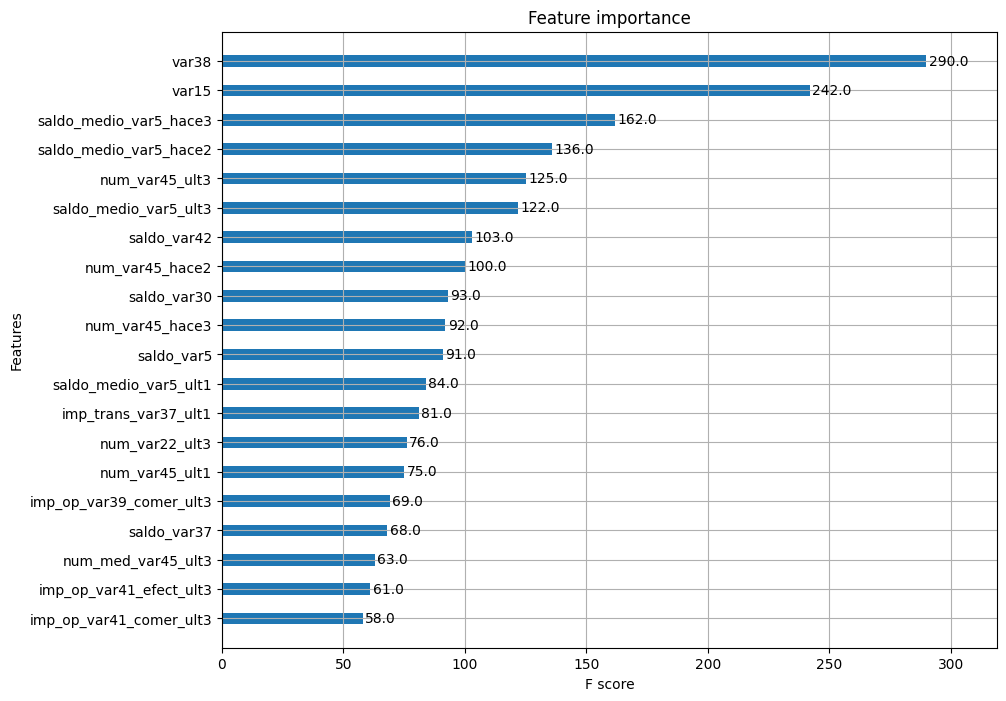

In [17]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, colsample_bytree=0.5, max_depth=5, min_child_weight=3)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')

print(xgb_roc_score)

from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)
plt.show()